import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

<font size="6">IRIS Çiçeğinin Sınıflandırması Projesi(LVQ-K*-MEANS-ANFIS-CNN) İLE</font>

<font size="6">1-LVQ MODELİ </font>

In [3]:
data = pd.read_csv('iris.csv')

In [4]:
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
X = data.iloc[:,:5]
Y = data.iloc[:,-1]


In [6]:
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [7]:
Y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [8]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [9]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

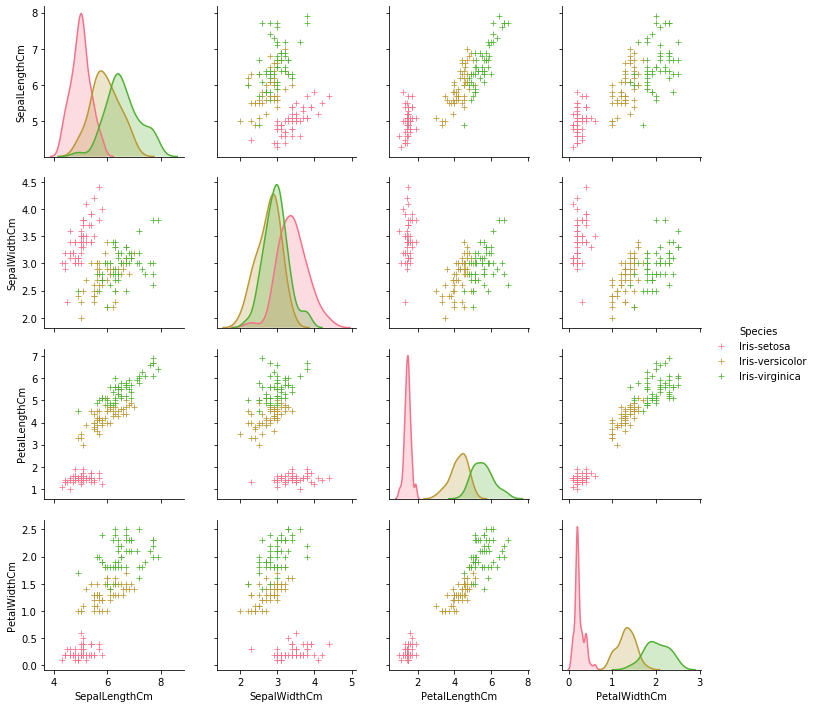

In [11]:
temp = data.drop("Id",axis=1)
g = sns.pairplot(temp, hue='Species',markers="+")
plt.show()

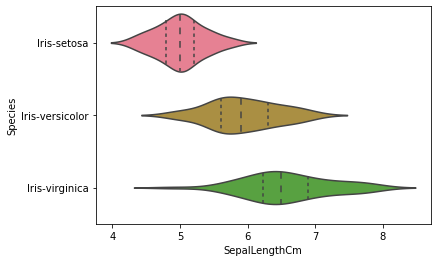

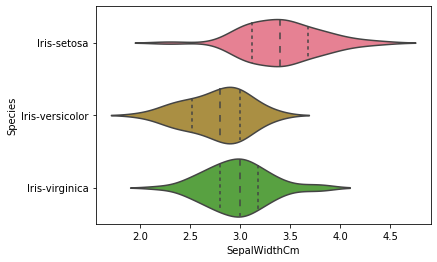

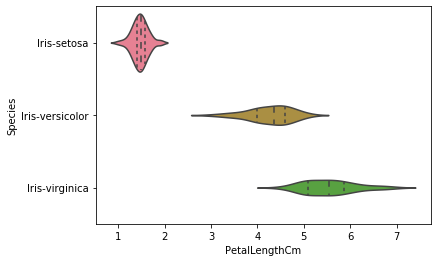

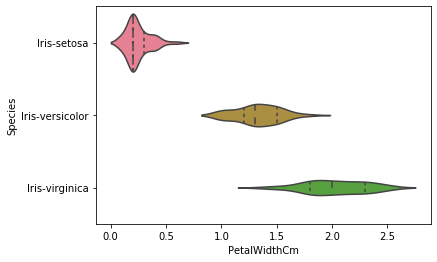

In [13]:
g = sns.violinplot(y='Species', x='SepalLengthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='SepalWidthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalLengthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalWidthCm', data=data, inner='quartile')
plt.show()

In [15]:
X.head()



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [17]:
print(X.shape)
# print(y.head())
print(Y.shape)

(150, 5)
(150,)


In [26]:
Y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [29]:
Y = preprocessing.LabelEncoder().fit_transform(Y)



In [34]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
from neupy import algorithms
classifier = algorithms.LVQ(n_inputs=4, n_classes=3)

In [6]:
from  sklearn import  datasets
import numpy as np
iris=datasets.load_iris()
x=iris.data
y=iris.target
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

classifier.train(x_train,y_train,epochs=100)
predictions=classifier.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))
u_input = np.array([[6.4, 3.5, 4.5, 1.2]])
if classifier.predict(u_input) == 0:
	print('Setosa')
elif classifier.predict(u_input) == 1:
	print('Versicolor')
else:
	print('virginica')

0.9066666666666666
Versicolor


<font size="6">2-K-Means MODELİ </font>

In [7]:
import pickle


In [9]:
pickle.dump(classifier,open('NEwQuerty.sav','wb'))



In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn.metrics as sm
%matplotlib inline

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [3]:
print (iris.target_names)

['setosa' 'versicolor' 'virginica']


In [4]:
print (iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])

In [6]:
x.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


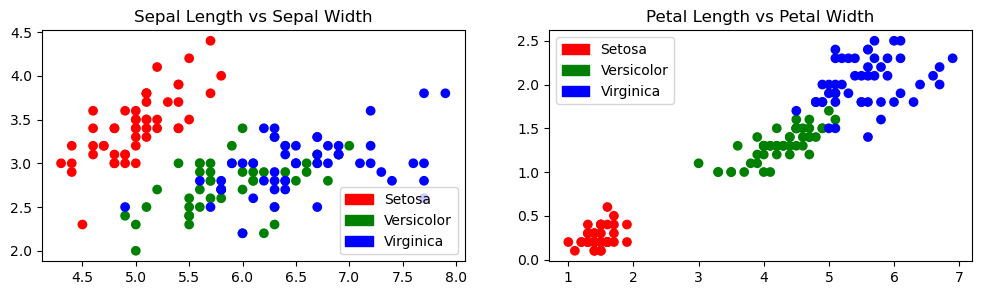

In [8]:
plt.figure(figsize=(12,3))
colors = np.array(['red', 'green', 'blue'])
iris_targets_legend = np.array(iris.target_names)
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')


plt.subplot(1, 2, 1)
plt.scatter(x['Sepal Length'], x['Sepal Width'], c=colors[y['Target']])
plt.title('Sepal Length vs Sepal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1,2,2)
plt.scatter(x['Petal Length'], x['Petal Width'], c= colors[y['Target']])
plt.title('Petal Length vs Petal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

In [9]:
iris_k_mean_model = KMeans(n_clusters=3)
iris_k_mean_model.fit(x)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [10]:
print (iris_k_mean_model.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [11]:
print (iris_k_mean_model.cluster_centers_)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


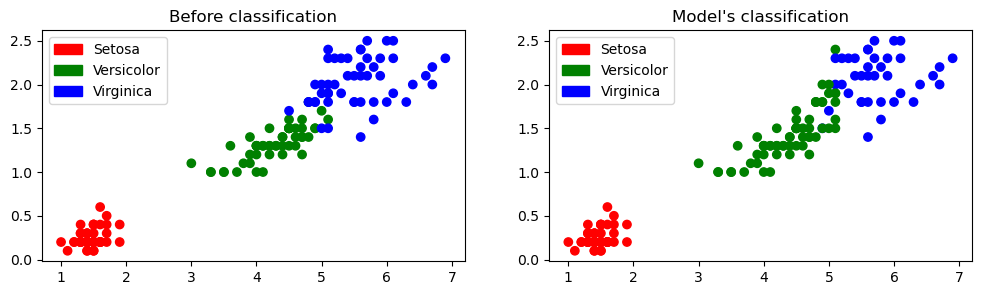

In [12]:
plt.figure(figsize=(12,3))

colors = np.array(['red', 'green', 'blue'])

predictedY = np.choose(iris_k_mean_model.labels_, [1, 0, 2]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[y['Target']])
plt.title('Before classification')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1, 2, 2)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[predictedY])
plt.title("Model's classification")
plt.legend(handles=[red_patch, green_patch, blue_patch])

In [14]:
sm.accuracy_score(predictedY, y['Target'])

0.8933333333333333

In [15]:
sm.confusion_matrix(predictedY, y['Target'])

array([[50,  0,  0],
       [ 0, 48, 14],
       [ 0,  2, 36]])

In [16]:
x.shape

(150, 4)

In [17]:
dist_points_from_cluster_center = []
K = range(1,10)
for no_of_clusters in K:
  k_model = KMeans(n_clusters=no_of_clusters)
  k_model.fit(x)
  dist_points_from_cluster_center.append(k_model.inertia_)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

In [18]:
dist_points_from_cluster_center

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.71230193050193,
 39.03998724608725,
 34.58027597402597,
 29.990426406926403,
 27.78726218956482]

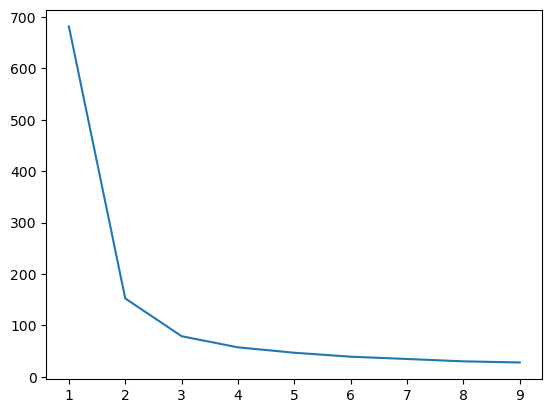

In [19]:
plt.plot(K, dist_points_from_cluster_center)

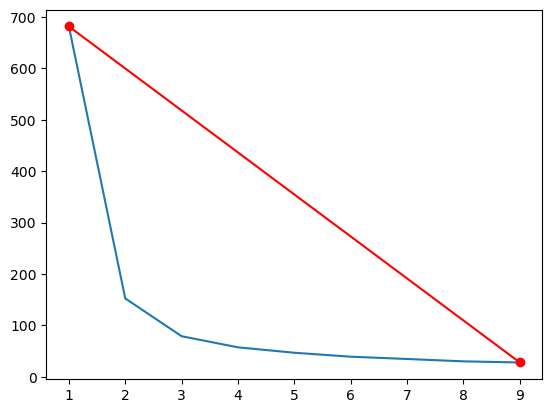

In [20]:
plt.plot(K, dist_points_from_cluster_center)
plt.plot([K[0], K[8]], [dist_points_from_cluster_center[0], 
                        dist_points_from_cluster_center[8]], 'ro-')
plt.show()

a = -81.69791722630441
b = 763.0685172263043


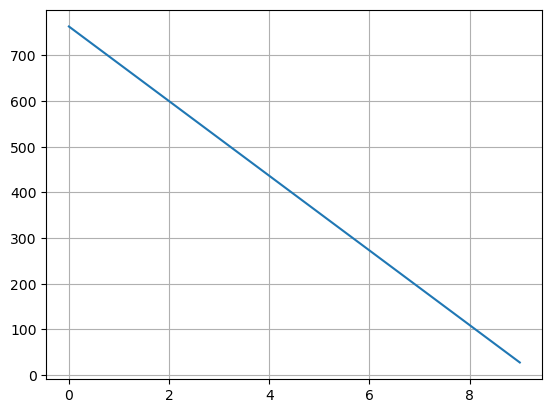

In [21]:
x = [K[0], K[8]]
y = [dist_points_from_cluster_center[0], dist_points_from_cluster_center[8]]

# Calculate the coefficients. This line answers the initial question. 
coefficients = np.polyfit(x, y, 1)

# Print the findings
print ('a =', coefficients[0])
print ('b =', coefficients[1])

# Let's compute the values of the line...
polynomial = np.poly1d(coefficients)
x_axis = np.linspace(0,9,100)
y_axis = polynomial(x_axis)

# ...and plot the points and the line
plt.plot(x_axis, y_axis)
plt.grid('on')
plt.show()
     

In [22]:
# Function to find distance
# https://www.geeksforgeeks.org/perpendicular-distance-
# between-a-point-and-a-line-in-2-d/
def calc_distance(x1, y1, a, b, c):
  d = abs((a * x1 + b * y1 + c)) / (math.sqrt(a * a + b * b))
  return d

In [23]:
# (y1 – y2)x + (x2 – x1)y + (x1y2 – x2y1) = 0
# https://bobobobo.wordpress.com/2008/01/07/solving-linear-equations-ax-by-c-0/
a = dist_points_from_cluster_center[0] - dist_points_from_cluster_center[8]
b = K[8] - K[0]
c1 = K[0] * dist_points_from_cluster_center[8]
c2 = K[8] * dist_points_from_cluster_center[0]
c = c1 - c2

In [24]:
dist_points_from_cluster_center

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.71230193050193,
 39.03998724608725,
 34.58027597402597,
 29.990426406926403,
 27.78726218956482]

In [25]:
import math

distance_of_points_from_line = []
for k in range(9):
    distance_of_points_from_line.append(calc_distance(K[k], dist_points_from_cluster_center[k], a, b, c))

def calc_distance(x1, y1, a, b, c):
    d = abs((a * x1 + b * y1 + c)) / (math.sqrt(a * a + b * b))
    return d
     

In [26]:

distance_of_points_from_line

[0.0,
 5.4749403685295315,
 5.37456091137201,
 4.639285750637097,
 3.7680712003476793,
 2.8620498436853543,
 1.9167084787808608,
 0.9729599151582975,
 0.0]

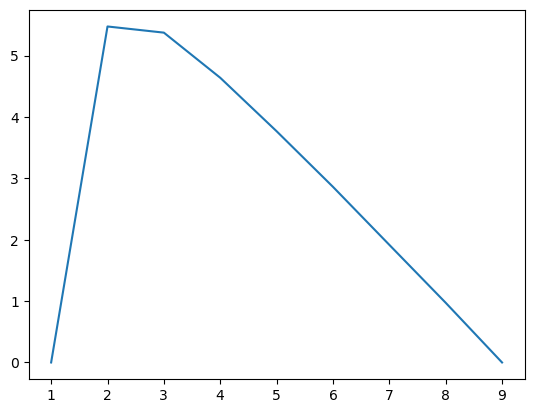

In [27]:

plt.plot(K, distance_of_points_from_line)

<font size="6">3-ANFIS MODELI</font>

In [15]:
import numpy as np
# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [16]:
import time,os 
dir_ = str(time.time())
os.mkdir(dir_)
print("\n\n\n\n["+dir_+"] >>>>>>>>>>>>>")





[1714827632.4324448] >>>>>>>>>>>>>


In [17]:
df = pd.read_csv("iris.csv")

In [18]:
y = df["Species"].to_numpy()

In [19]:
X = df.drop(["Species"], axis=1).to_numpy()

In [20]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X = scaled_data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.16, random_state=2021, stratify=y)

In [22]:
import numpy as np

unique_train, counts_train = np.unique(y_train, return_counts=True)
print("Train:")
print(dict(zip(unique_train, counts_train)))

unique_test, counts_test = np.unique(y_test, return_counts=True)
print("Test:")
print(dict(zip(unique_test, counts_test)))

Train:
{'Iris-setosa': 42, 'Iris-versicolor': 42, 'Iris-virginica': 42}
Test:
{'Iris-setosa': 8, 'Iris-versicolor': 8, 'Iris-virginica': 8}


In [23]:
n = X_train.shape[1] # no of input features
m = 2*n # number of fuzzy rules

learning_rate = 0.01
epochs = 1000

In [52]:
import tensorflow as tf
from tensorflow import keras

class MyLayer(keras.layers.Layer):
    def __init__(self):
        super(MyLayer, self).__init__()

    def call(self, inputs):
        X_train, y_train, X_test, y_test = inputs
        # Perform custom operations here
        train_loss = tf.reduce_mean(tf.square(tf.subtract(X_train, y_train)))
        test_loss = tf.reduce_mean(tf.square(tf.subtract(X_test, y_test)))
        return train_loss, test_loss

# Create an instance of the custom layer
my_layer = MyLayer()

# Generate some dummy data
X_train = tf.random.normal((100, 10))
y_train = tf.random.normal((100, 10))
X_test = tf.random.normal((50, 10))
y_test = tf.random.normal((50, 10))

# Call the custom layer with the input variables
train_loss, test_loss = my_layer([X_train, y_train, X_test, y_test])

print("Train Loss:", train_loss)
print("Test Loss:", test_loss)

Train Loss: Tensor("my_layer_4_1/Mean:0", shape=(), dtype=float32)
Test Loss: Tensor("my_layer_4_1/Mean_1:0", shape=(), dtype=float32)


In [81]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

iris = load_iris()
X = iris.data
y = iris.target

# One-hot encode the target variable
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [82]:
import tensorflow as tf

class ANFIS(tf.keras.Model):
    def __init__(self, n_inputs, n_rules):
        super(ANFIS, self).__init__()
        self.n_inputs = n_inputs
        self.n_rules = n_rules

        self.mu = tf.Variable(tf.random.normal(shape=(n_rules, n_inputs), mean=0, stddev=1), name="mu")
        self.sigma = tf.Variable(tf.random.normal(shape=(n_rules, n_inputs), mean=0, stddev=1), name="sigma")
        self.w = tf.Variable(tf.random.normal(shape=(n_rules, n_inputs), mean=0, stddev=1), name="w")
        self.b = tf.Variable(tf.random.normal(shape=(n_rules,), mean=0, stddev=1), name="b")

    def call(self, x):
        rula = tf.exp(-0.5 * tf.reduce_sum(((tf.expand_dims(x, axis=1) - self.mu) / self.sigma) ** 2, axis=2))
        y = tf.reduce_sum(self.w * rula, axis=1) / tf.clip_by_value(tf.reduce_sum(rula, axis=1), 1e-8, 1e8)
        return y

# Create an instance of the ANFIS model
anfis_model = ANFIS(n_inputs=X_train.shape[1], n_rules=4)

In [83]:
def custom_loss(y_true, y_pred):
    return tf.losses.categorical_crossentropy(y_true, y_pred)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [85]:
def call(self, x):
    expanded_x = tf.expand_dims(x, axis=1)  # Expand dimensions for broadcasting
    expanded_mu = tf.expand_dims(self.mu, axis=0)  # Expand dimensions for broadcasting
    expanded_sigma = tf.expand_dims(self.sigma, axis=0)  # Expand dimensions for broadcasting

    # Calculate the rule activations
    rule_activations = tf.exp(-0.5 * tf.reduce_sum(((expanded_x - expanded_mu) / expanded_sigma) ** 2, axis=2))

    # Calculate the normalized rule activations
    normalized_activations = rule_activations / tf.clip_by_value(tf.reduce_sum(rule_activations, axis=1, keepdims=True), 1e-8, 1e8)

    # Calculate the weighted rule outputs
    weighted_rule_outputs = tf.reduce_sum(tf.expand_dims(self.w, axis=0) * tf.expand_dims(normalized_activations, axis=2), axis=1)

    # Calculate the final output
    y = tf.reduce_sum(weighted_rule_outputs, axis=1)

    return y

In [88]:
import numpy as np

# Assuming X_train is your input data
# Define the expected input dimensions for your ANFIS model
input_dim = 4  # Example input dimension

# Check the shape of X_train
print("Original shape of X_train:", X_train.shape)

# Reshape X_train if needed to match the expected input dimension
if X_train.shape[1] != input_dim:
    print("Reshaping X_train...")
    X_train = X_train.reshape(-1, input_dim)  # Reshape X_train to have the correct input dimension

# Check the shape of X_train after potential reshaping
print("Final shape of X_train:", X_train.shape)

Original shape of X_train: (120, 4)
Final shape of X_train: (120, 4)


In [91]:
def call(self, x):
    rula = tf.exp(-0.5 * tf.reduce_sum(((tf.expand_dims(x, axis=1) - self.mu) / self.sigma) ** 2, axis=2))
    
    # Broadcast self.w to match the shape of rula for element-wise multiplication
    w_broadcasted = tf.expand_dims(self.w, axis=0)  # Add a new axis to match the batch dimension
    
    y = tf.reduce_sum(w_broadcasted * rula, axis=2) / tf.clip_by_value(tf.reduce_sum(rula, axis=2), 1e-8, 1e8)
    
    return y

<font size="6">4-CNN MODELI</font>

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import random

import os

In [2]:
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data.drop(columns = ['Id'], axis = 1, inplace = True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

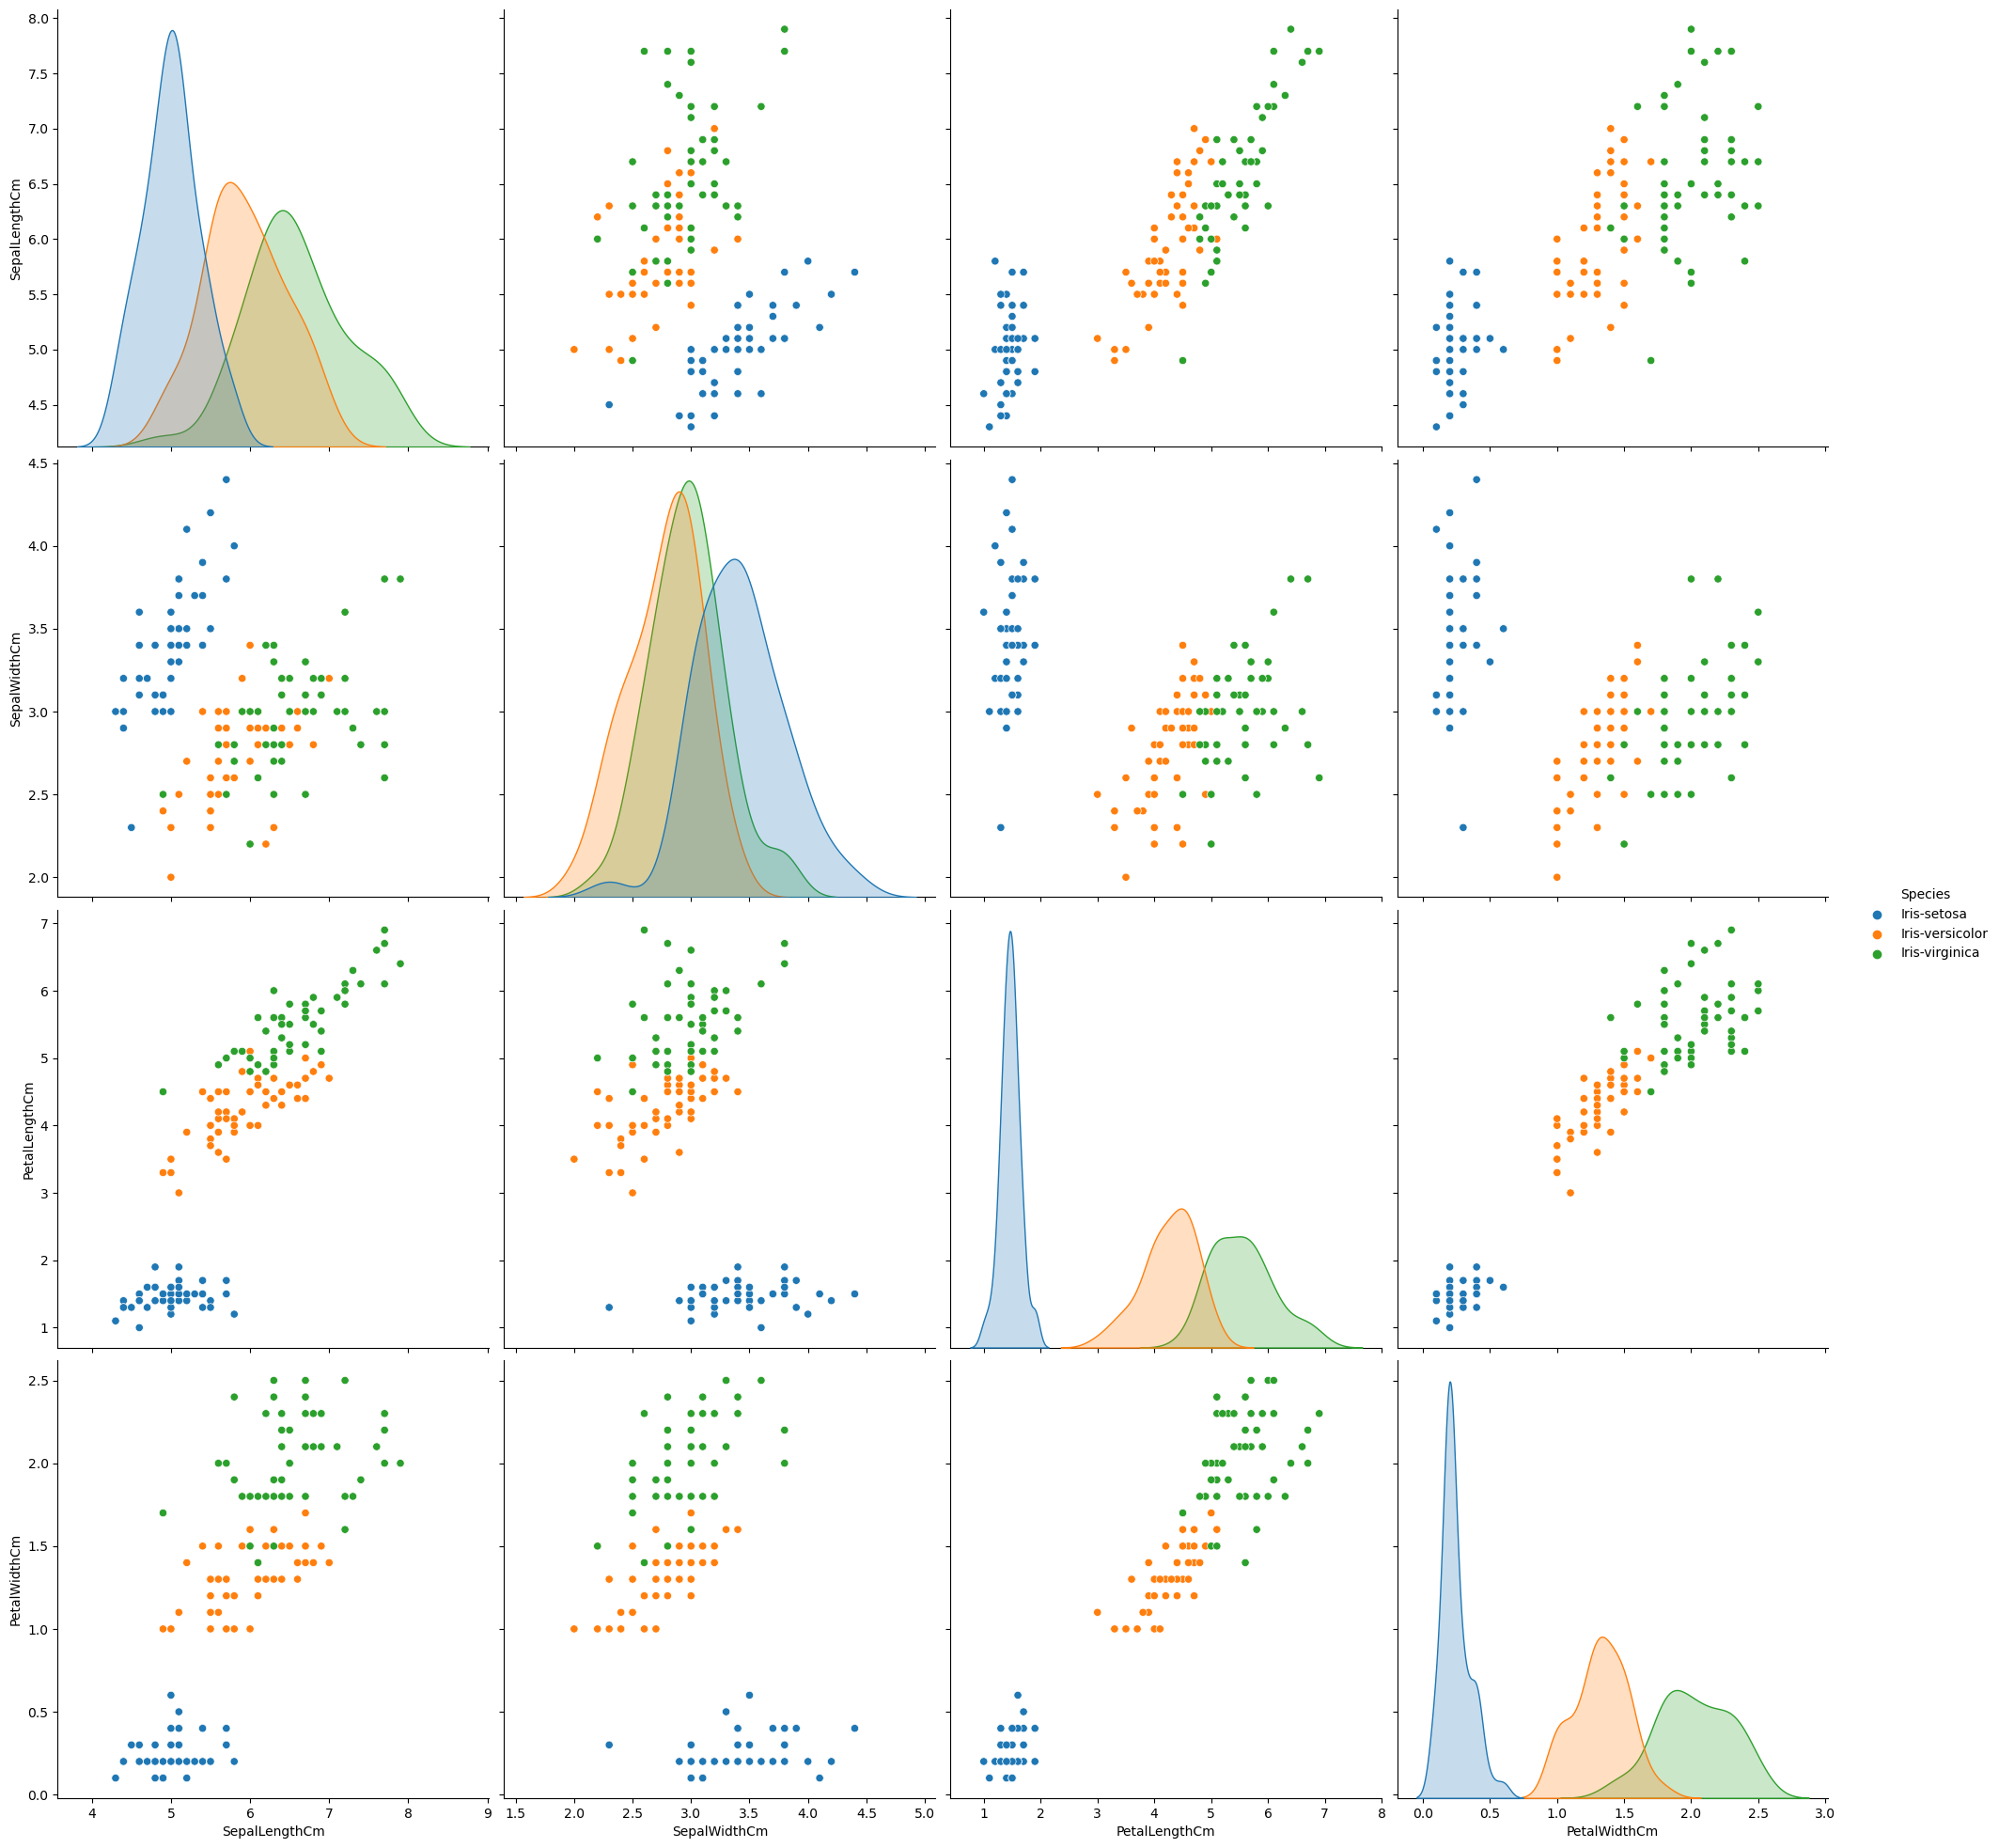

In [7]:
sns.pairplot(data, hue = 'Species', height = 5)
plt.show()

In [8]:
X = data.drop(['Species'], axis = 1)
y = data['Species']

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [10]:
y[:5]

array([0, 0, 0, 0, 0])

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [13]:
import tensorflow as tf
tf.__version__

2024-05-06 18:32:32.987017: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


'2.16.1'

In [14]:
# let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
           tf.keras.layers.Dense(3, activation='relu'),
           tf.keras.layers.Dense(5, activation='relu'),
           tf.keras.layers.Dense(3, activation='softmax')
])

# 2. Comile the model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 metrics=['accuracy'])

# 3. Fit the model
history = model_1.fit(X_train, 
                      tf.one_hot(y_train, depth=3), 
                      epochs=100,
                      verbose = 1)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3600 - loss: 1.1407
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3065 - loss: 1.0799 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2954 - loss: 1.0449 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3533 - loss: 1.0233 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5479 - loss: 1.0078 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6446 - loss: 0.9948 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6875 - loss: 0.9816 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7023 - loss: 0.9680 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7269 - loss: 0.9522 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7333 - loss: 0.9322 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7327 - loss: 0.9080  
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7327 - los

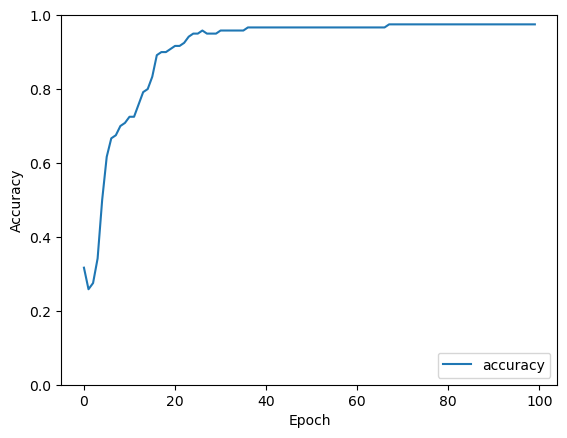

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.0])
plt.legend(loc='lower right');

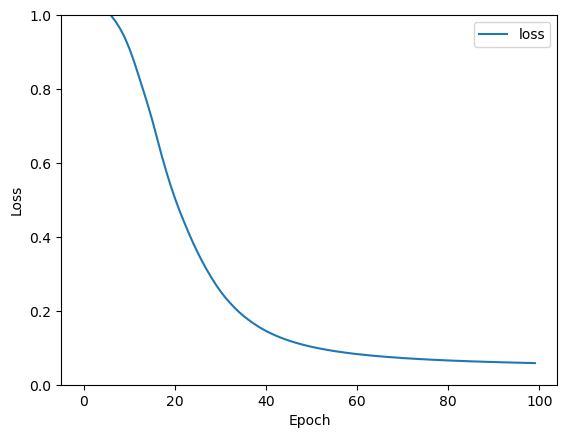

In [16]:
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 1])
plt.legend(loc='upper right');

In [17]:
model_1.evaluate(X_test, tf.one_hot(y_test, depth=3))[1] * 100

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step - accuracy: 1.0000 - loss: 0.0471


100.0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


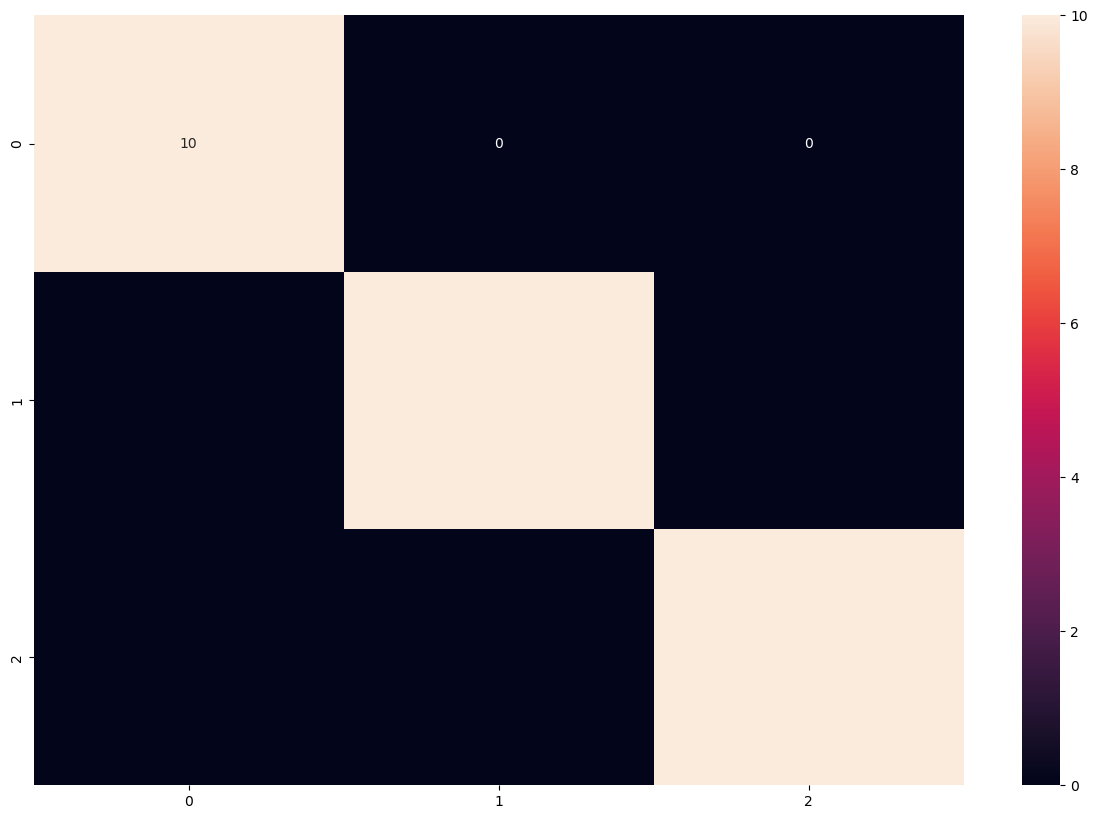

In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(15, 10))
sns.heatmap(confusion_matrix(y_true=y_test, 
                 y_pred=model_1.predict(X_test).argmax(axis=1)), annot=True,
                 fmt="d");